## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# install opencv if you haven't
!conda install -c https://conda.binstar.org/menpo opencv3
!pip install pillow

/bin/bash: line 1: conda: command not found


In [39]:
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
import numpy as np
import pandas as pd

import os
import cv2
from imageio import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [41]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        # Check if the camera opened successfully
        if not camera.isOpened():
            print("Error: Could not open camera.")
            return False

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        # Check if frame is read correctly
        if not retval:
            print("Error: Could not read frame from camera.")
            return False

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [42]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Y3T2[DeepLearning]/Dataset/❤.png"

if save_webcam_image(image_path) is False:
    print("Using the Test My Love Image: {}".format(image_path))

Error: Could not open camera.
Using the Test My Love Image: /content/drive/MyDrive/Colab Notebooks/Y3T2[DeepLearning]/Dataset/❤.png


<ipython-input-43-e6f9c98fef0b>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(image_path))


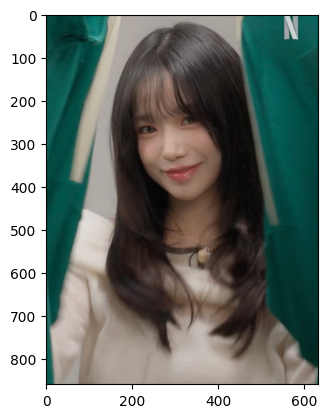

In [43]:
plt.imshow(imread(image_path))

## VGG16 - Pretrained Model

In [44]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [46]:
img_path="/content/drive/MyDrive/Colab Notebooks/Y3T2[DeepLearning]/Dataset/❤.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Predicted Class            Name  Probability
0       n03476991      hair_spray     0.110998
1       n03595614          jersey     0.073907
2       n03710637         maillot     0.073643
3       n03450230            gown     0.063651
4       n03787032     mortarboard     0.055567
5       n02892767       brassiere     0.040730
6       n04370456      sweatshirt     0.039635
7       n04136333          sarong     0.034265
8       n03045698           cloak     0.027213
9       n04209239  shower_curtain     0.027148

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


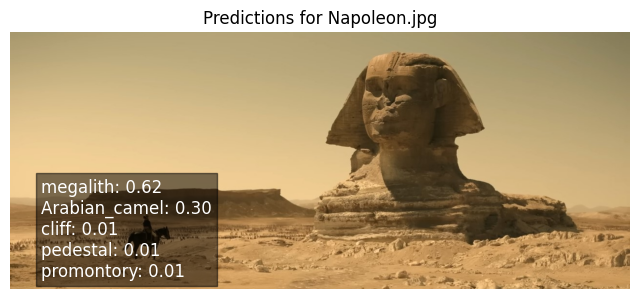

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


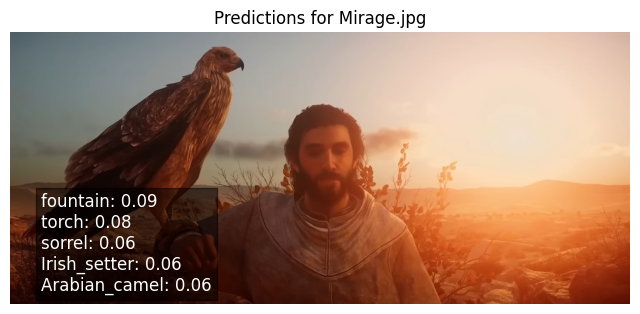

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


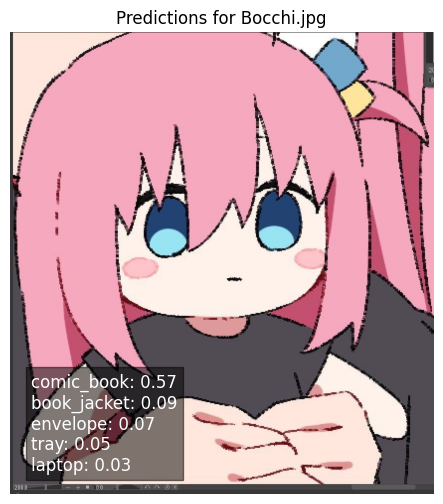

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


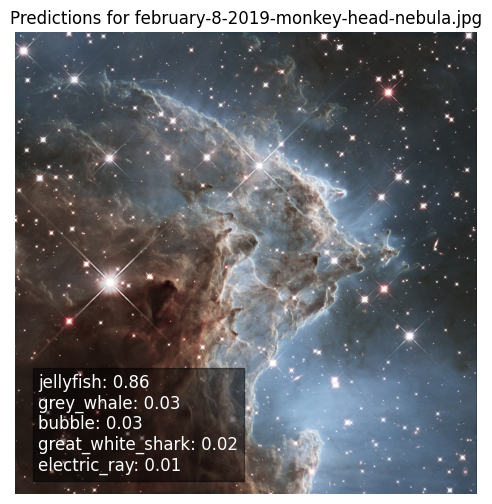

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


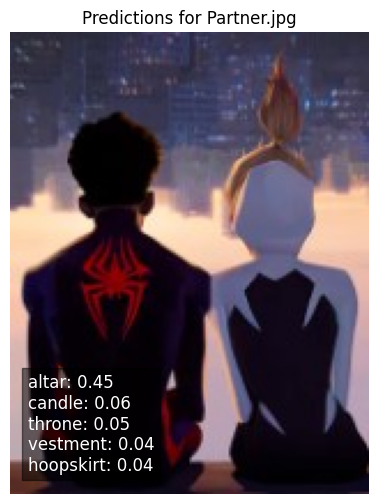

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


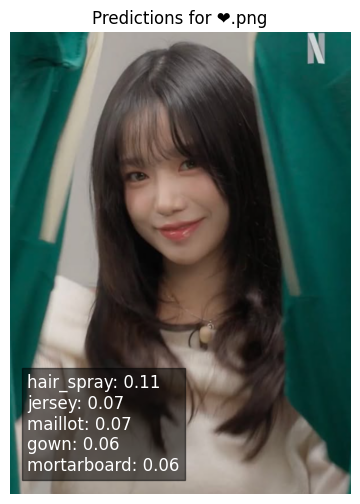

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


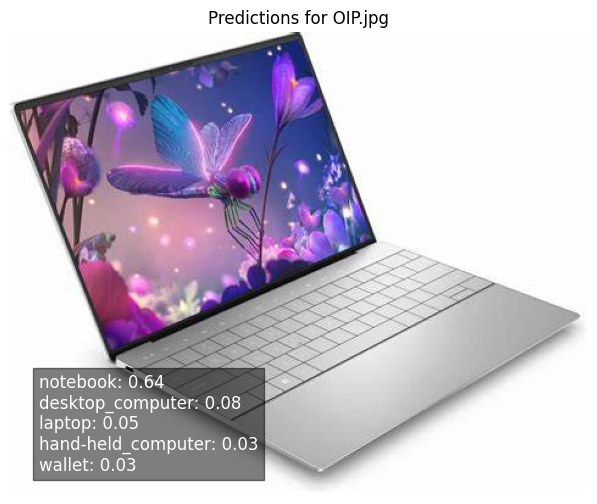

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


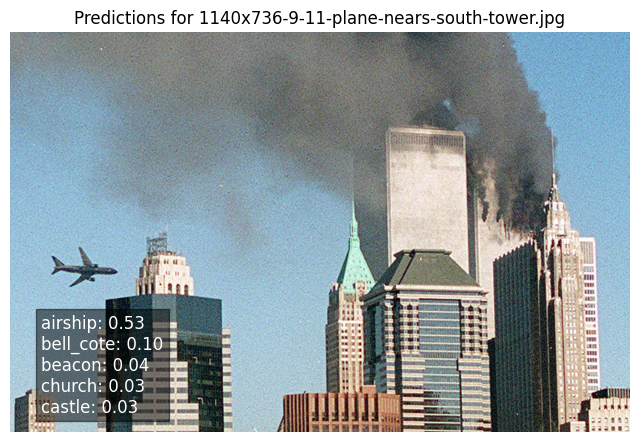

In [47]:
image_path_for_vgg = "/content/drive/MyDrive/Colab Notebooks/Y3T2[DeepLearning]/Dataset"

for filename in os.listdir(image_path_for_vgg):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(image_path_for_vgg, filename)

        # Load the image for display
        img = Image.open(img_path)

        # Make predictions
        predictions = predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

        # Display the image and predictions
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.imshow(img)
        plt.title(f"Predictions for {filename}")
        plt.axis('off')  # Turn off axis ticks and labels

        # Display predictions as text on the plot
        prediction_text = "\n".join([f"{name}: {prob:.2f}" for _, name, prob in predictions.values[:5]])  # Show top 5 predictions
        plt.text(0.05, 0.05, prediction_text, transform=plt.gca().transAxes, fontsize=12, color='white',
                 bbox=dict(facecolor='black', alpha=0.5))

        plt.show()

## Resnet50 - Pretrained Model

In [48]:
# Define a Resnet model and print the model summary (follow the same procedure as in VGGNet)
from keras.applications import resnet50

img_path = 'imagenet'
image_directory = '/content/drive/MyDrive/Colab Notebooks/Y3T2[DeepLearning]/Dataset/'

resnet_model = resnet50.ResNet50(weights = img_path)
resnet_model.summary()

# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


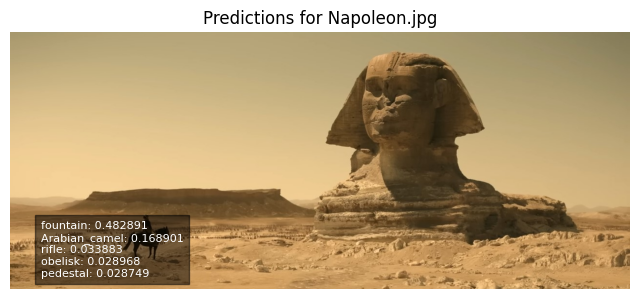

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


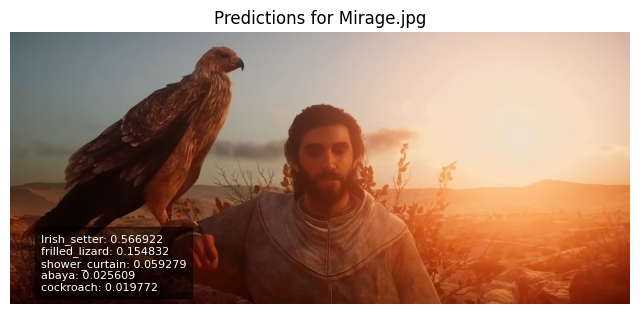

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


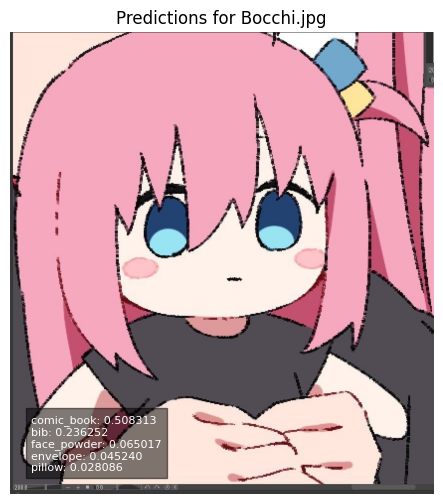

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


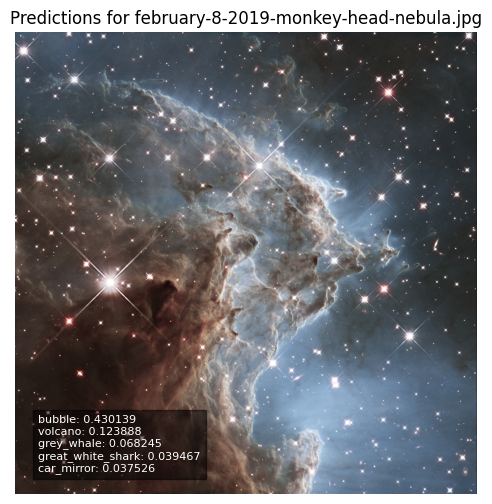

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


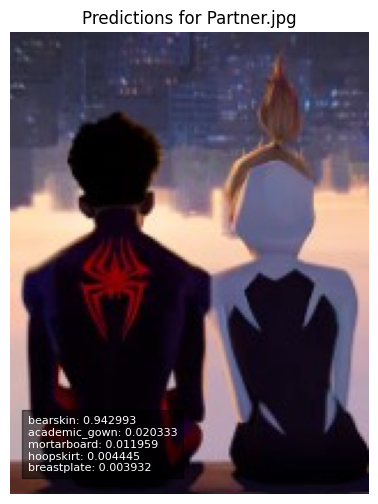

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


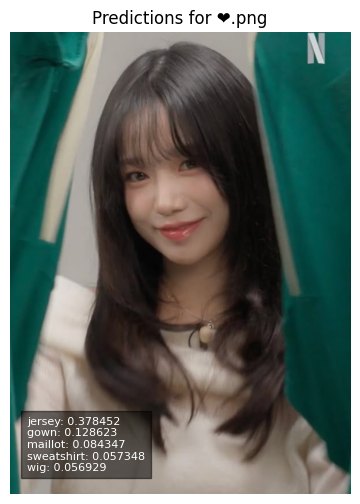

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


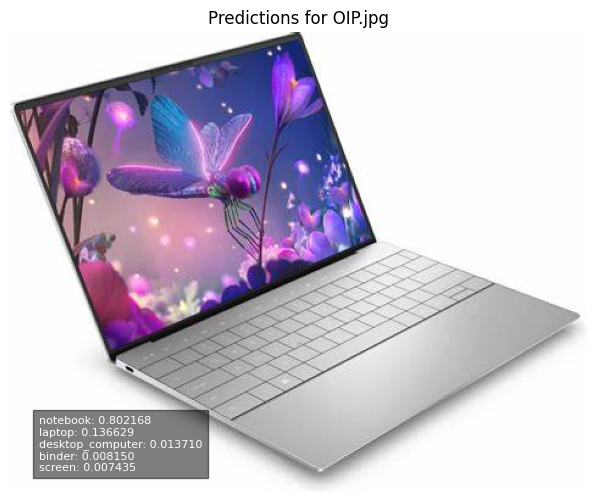

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


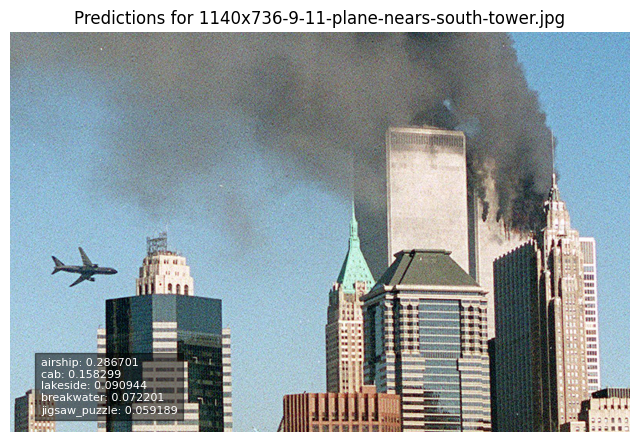

In [49]:
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(image_directory, filename)

        # Load the image for display
        img = Image.open(img_path)

        # Make predictions
        predictions = predict_image(resnet_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

        # Display the image and predictions
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.imshow(img)
        plt.title(f"Predictions for {filename}")
        plt.axis('off')  # Turn off axis ticks and labels

        # Display predictions as text on the plot
        prediction_text = "\n".join([f"{name}: {prob:.6f}" for _, name, prob in predictions.values[:5]])  # Show top 5 predictions
        plt.text(0.05, 0.05, prediction_text, transform=plt.gca().transAxes, fontsize=8, color='white',
                 bbox=dict(facecolor='black', alpha=0.5))

        plt.show()

In [50]:
# Predict Results
for filename in os.listdir(image_directory):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    img_path = os.path.join(image_directory, filename)
    predictions = predict_image(resnet_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)
    print(f"Predictions for {filename}:\n{predictions}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predictions for Napoleon.jpg:
  Predicted Class           Name  Probability
0       n03388043       fountain     0.482891
1       n02437312  Arabian_camel     0.168901
2       n04090263          rifle     0.033883
3       n03837869        obelisk     0.028968
4       n03903868       pedestal     0.028749
5       n03743016       megalith     0.022419
6       n04346328          stupa     0.022067
7       n04141076            sax     0.016281
8       n02667093          abaya     0.015213
9       n04485082         tripod     0.013627

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Predictions for Mirage.jpg:
  Predicted Class            Name  Probability
0       n02100877    Irish_setter     0.566922
1       n01688243  frilled_lizard     0.154832
2       n04209239  shower_curtain     0.059279
3       n02667093           abaya     0.025609
4       n02233338       cockroach     0.019772
5       n03980874          poncho     0.018118
6       n03450230           


**1. Did the models get the "right" answer?  Was the "right" answer on the list?**

**Ans** I tested model with 7 images data. And the result mostly correct or right if we compared with another answer on the list.

**2. How confident was the prediction (did the top choice have a probability close to 1?)**

**Ans** Mostly model predicted at average 0.63 , and the top choice that have probability close to 1 have 1 picture at 0.94 from 7 pictures.

**3. How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)**




**Ans** The model such as VGG and Resnet have a step to handle multiple objects is

1. Feature Extraction: These features represent different aspects of the image, such as edges, textures, and shapes.
2. Hierachical Processing: CNNs process information heirarchically, starting with low-level features like edges and gradually building up to more complex features like object parts and entire objects in a scene.
3. Object Detection and Localization: These models will draw bounding boxes around them and indicting their location in the image.
4. Attention Mechanisms: Some models use attention mechanisms to focus or trying to understand the situation that happen in this picture like human look picture. So this can help the model to better handle images with multiple objects.





**4. What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?**

**Ans** I think is from the handle multiple objects process in model. I will explaing by reference the output from Napoleon.jpg, I think the model have training data with picture that contain by statue and water. So when the model tested by Napoleon.jpg. A model will answer fountain in top choice with higher probability at 0.42. In addition I searched all classes in imagenet and I know that imagenet not have classes desert too, therefore model will use object detection localization and attention mechanisms to predict that Napoleon picture is about the fountain.